In [59]:
import pandas as pd
import re
import seaborn as sns
df = pd.read_csv("movies.csv")
df.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


In [60]:
df.shape

(9999, 9)

In [64]:
df.duplicated().sum()

431

In [65]:
df = df.drop_duplicates()

In [61]:
#checking percentage of missing values on each column
df.isnull().sum()/df.shape[0]*100

MOVIES       0.000000
YEAR         6.440644
GENRE        0.800080
RATING      18.201820
ONE-LINE     0.000000
STARS        0.000000
VOTES       18.201820
RunTime     29.582958
Gross       95.399540
dtype: float64

In [63]:
#to drop Gross column since it has a striking percentage of missing values 
df = df.drop(columns = 'Gross')

In [ ]:
WORKING WITH THE RunTime Column

In [66]:
df['RunTime']

0       121.0
1        25.0
2        44.0
3        23.0
4         NaN
        ...  
9993      NaN
9995      NaN
9996      NaN
9997      NaN
9998      NaN
Name: RunTime, Length: 9568, dtype: float64

In [67]:
#getting mean to fill irregular missing values on this column
df['RunTime'].mean()

68.87414383561644

In [68]:
# mean value(mv) approx to 1decimal place
mv = 69.0
df['RunTime'].fillna(mv, inplace=True)
df['RunTime']

0       121.0
1        25.0
2        44.0
3        23.0
4        69.0
        ...  
9993     69.0
9995     69.0
9996     69.0
9997     69.0
9998     69.0
Name: RunTime, Length: 9568, dtype: float64

In [ ]:
UNTO CLEANING THE VOTES COLUMN

In [69]:
df['VOTES']


0        21,062
1        17,870
2       885,805
3       414,849
4           NaN
         ...   
9993        NaN
9995        NaN
9996        NaN
9997        NaN
9998        NaN
Name: VOTES, Length: 9568, dtype: object

In [70]:

# 1. Removing commas from the figures
df.loc[:, 'VOTES'] = df['VOTES'].str.replace(',', '')

# 2. Converting values to numeric to enable replacement of null values
df.loc[:, 'VOTES'] = pd.to_numeric(df['VOTES'], errors='coerce')

df['VOTES']


0        21062.0
1        17870.0
2       885805.0
3       414849.0
4            NaN
          ...   
9993         NaN
9995         NaN
9996         NaN
9997         NaN
9998         NaN
Name: VOTES, Length: 9568, dtype: float64

In [71]:
#filling missing values through linear interpolation
df['VOTES'].interpolate(method='linear', inplace = True)
df['VOTES']

0        21062.0
1        17870.0
2       885805.0
3       414849.0
4       220353.5
          ...   
9993       433.0
9995       433.0
9996       433.0
9997       433.0
9998       433.0
Name: VOTES, Length: 9568, dtype: float64

In [72]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062.0,121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17870.0,25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849.0,23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,220353.5,69.0
...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",NaN,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,433.0,69.0
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,433.0,69.0
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,433.0,69.0
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,433.0,69.0


In [ ]:
WORKING WITH THE STARS COLUMN

In [73]:
df['STARS'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9568 entries, 0 to 9998
Series name: STARS
Non-Null Count  Dtype 
--------------  ----- 
9568 non-null   object
dtypes: object(1)
memory usage: 149.5+ KB


In [74]:
#checking out unique values of this column, you'd notice we have directors and stars mixed
df['STARS'].nunique

<bound method IndexOpsMixin.nunique of 0       \n    Director:\nPeter Thorwarth\n| \n    Star...
1       \n            \n    Stars:\nChris Wood, \nSara...
2       \n            \n    Stars:\nAndrew Lincoln, \n...
3       \n            \n    Stars:\nJustin Roiland, \n...
4       \n    Director:\nMatthias Schweighöfer\n| \n  ...
                              ...                        
9993    \n    Director:\nNicolai Rohde\n| \n    Stars:...
9995                                                   \n
9996    \n    Director:\nOrlando von Einsiedel\n| \n  ...
9997    \n    Director:\nJovanka Vuckovic\n| \n    Sta...
9998    \n    Director:\nJovanka Vuckovic\n| \n    Sta...
Name: STARS, Length: 9568, dtype: object>

In [75]:
#creating seperate columns for Directors and STARS
def extract_director(text):
  if text is not None and 'Director:' in text:
    return text.split('|')[0].replace('Director:', '').strip()
  return None

def extract_stars(text):
  if text is not None and 'Stars:' in text:
    return text.split('|')[-1].replace('Stars:', '').strip()
  return None

# Apply the functions
df['Director'] = df['STARS'].apply(extract_director)
df['STARS'] = df['STARS'].apply(extract_stars)
df


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Director
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,"Peri Baumeister, \nCarl Anton Koch, \nAlexande...",21062.0,121.0,Peter Thorwarth
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"Chris Wood, \nSarah Michelle Gellar, \nLena He...",17870.0,25.0,None
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"Andrew Lincoln, \nNorman Reedus, \nMelissa McB...",885805.0,44.0,None
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"Justin Roiland, \nChris Parnell, \nSpencer Gra...",414849.0,23.0,None
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...","Matthias Schweighöfer, \nNathalie Emmanuel, \n...",220353.5,69.0,Matthias Schweighöfer
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",NaN,\nAdd a Plot\n,"Felix Klare, \nRomina Küper, \nAnna Maria Mühe...",433.0,69.0,Nicolai Rohde
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,None,433.0,69.0,None
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,None,433.0,69.0,Orlando von Einsiedel
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,"Morgan Taylor Campbell, \nIñaki Godoy, \nRhian...",433.0,69.0,Jovanka Vuckovic


In [76]:
#taking out extra space from stars column
df.loc[:, 'STARS'] = df['STARS'].str.replace('\n', '')
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Director
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",21062.0,121.0,Peter Thorwarth
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",17870.0,25.0,None
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"Andrew Lincoln, Norman Reedus, Melissa McBride...",885805.0,44.0,None
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"Justin Roiland, Chris Parnell, Spencer Grammer...",414849.0,23.0,None
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...","Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",220353.5,69.0,Matthias Schweighöfer
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",NaN,\nAdd a Plot\n,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",433.0,69.0,Nicolai Rohde
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,None,433.0,69.0,None
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,None,433.0,69.0,Orlando von Einsiedel
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",433.0,69.0,Jovanka Vuckovic


In [ ]:
NEXT, ONE-LINE COLUMN

In [77]:
#almost perfect column, just needed to do away with the extra text, <\n>
df.loc[:, 'ONE-LINE'] = df['ONE-LINE'].str.replace('\n', '')
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Director
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",21062.0,121.0,Peter Thorwarth
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",17870.0,25.0,None
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...",885805.0,44.0,None
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...",414849.0,23.0,None
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"A prequel, set before the events of Army of th...","Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",220353.5,69.0,Matthias Schweighöfer
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",NaN,Add a Plot,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",433.0,69.0,Nicolai Rohde
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,Add a Plot,None,433.0,69.0,None
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,Add a Plot,None,433.0,69.0,Orlando von Einsiedel
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,Add a Plot,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",433.0,69.0,Jovanka Vuckovic


In [ ]:
NEXT, RATING COLUMN

In [79]:
#Went straight ahead to fill missing values
df['RATING'].interpolate(method='linear', inplace = True)
df['RATING']

0       6.1
1       5.0
2       8.2
3       9.2
4       8.4
       ... 
9993    8.8
9995    8.8
9996    8.8
9997    8.8
9998    8.8
Name: RATING, Length: 9568, dtype: float64

In [ ]:
NEXT, GENRE COLUMN

In [80]:
#taking out extra text
df.loc[:, 'GENRE'] = df['GENRE'].str.replace('\n', '')
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Director
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",21062.0,121.0,Peter Thorwarth
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",17870.0,25.0,None
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...",885805.0,44.0,None
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...",414849.0,23.0,None
4,Army of Thieves,(2021),"Action, Crime, Horror",8.4,"A prequel, set before the events of Army of th...","Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",220353.5,69.0,Matthias Schweighöfer
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"Drama, Thriller",8.8,Add a Plot,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",433.0,69.0,Nicolai Rohde
9995,Arcane,(2021– ),"Animation, Action, Adventure",8.8,Add a Plot,None,433.0,69.0,None
9996,Heart of Invictus,(2022– ),"Documentary, Sport",8.8,Add a Plot,None,433.0,69.0,Orlando von Einsiedel
9997,The Imperfects,(2021– ),"Adventure, Drama, Fantasy",8.8,Add a Plot,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",433.0,69.0,Jovanka Vuckovic


In [ ]:
UNTO THE YEAR COLUMN

In [81]:
#To better explore what data is on this column. I noticed a need to seperate the start and end year to help me do my visualizations freely at the end.
df['YEAR'].unique()

array(['(2021)', '(2021– )', '(2010–2022)', '(2013– )', '(2020– )',
       '(2006–2013)', '(2019– )', '(2016–2021)', '(2011– )', '(2005– )',
       '(2008–2013)', '(2017– )', '(2017–2021)', '(2016– )',
       '(1994–2004)', '(2014– )', '(2013–2020)', '(2015– )',
       '(2005–2020)', '(2013–2022)', '(2003– )', '(2009–2020)',
       '(I) (2018– )', '(2010–2015)', '(2011–2019)', '(2015–2020)',
       '(2005–2014)', '(2009–2015)', '(2008–2014)', '(2016–2018)',
       '(2009–2017)', '(2020)', '(2018–2021)', '(2017–2020)',
       '(1987–1994)', '(2018– )', '(2012– )', '(2014–2020)',
       '(2011–2018)', '(2005–2017)', '(2017)', '(2007–2015)',
       '(2000–2007)', '(II) (2007– )', '(1993)', '(1999–2022)',
       '(2015–2018)', '(2014–2019)', '(2016)', '(2012–2020)',
       '(2013–2019)', '(2007–2012)', '(2011–2020)', '(2010–2017)',
       '(2000–2015)', '(2015–2021)', '(2001)', '(1997– )', '(2011–2017)',
       '(1993–1999)', '(1989–1998)', '(2010–2013)', '(2010–2020)',
       '(2003–2019)

In [83]:
#creating functions to seperate the dates into release year and, year movie release stopped.
def get_years(yr_str):
    if pd.isna(yr_str):
        return None, None  
    
    # Removing non-year characters 
    new_str = re.sub(r"^[^(]*", "", yr_str)
    
    # Extract years from cleaned string
    years = re.findall(r"\d{4}", new_str)

    if len(years) == 0:
        return None, None
    elif len(years) == 1:
        return years[0], None if '–' in new_str else years[0]
    else:
        return years[0], years[-1]


df['Release_Year'], df['End_Year'] = zip(*df['YEAR'].apply(get_years))
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Director,Release_Year,End_Year
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",21062.0,121.0,Peter Thorwarth,2021,2021
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",17870.0,25.0,None,2021,None
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...",885805.0,44.0,None,2010,2022
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...",414849.0,23.0,None,2013,None
4,Army of Thieves,(2021),"Action, Crime, Horror",8.4,"A prequel, set before the events of Army of th...","Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",220353.5,69.0,Matthias Schweighöfer,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"Drama, Thriller",8.8,Add a Plot,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",433.0,69.0,Nicolai Rohde,2022,None
9995,Arcane,(2021– ),"Animation, Action, Adventure",8.8,Add a Plot,None,433.0,69.0,None,2021,None
9996,Heart of Invictus,(2022– ),"Documentary, Sport",8.8,Add a Plot,None,433.0,69.0,Orlando von Einsiedel,2022,None
9997,The Imperfects,(2021– ),"Adventure, Drama, Fantasy",8.8,Add a Plot,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",433.0,69.0,Jovanka Vuckovic,2021,None


In [86]:
# YEAR column no more of any use
df = df.drop('YEAR', axis=1)

In [87]:
df

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Director,Release_Year,End_Year
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",21062.0,121.0,Peter Thorwarth,2021,2021
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",17870.0,25.0,None,2021,None
2,The Walking Dead,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...",885805.0,44.0,None,2010,2022
3,Rick and Morty,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...",414849.0,23.0,None,2013,None
4,Army of Thieves,"Action, Crime, Horror",8.4,"A prequel, set before the events of Army of th...","Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",220353.5,69.0,Matthias Schweighöfer,2021,2021
...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,"Drama, Thriller",8.8,Add a Plot,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",433.0,69.0,Nicolai Rohde,2022,None
9995,Arcane,"Animation, Action, Adventure",8.8,Add a Plot,None,433.0,69.0,None,2021,None
9996,Heart of Invictus,"Documentary, Sport",8.8,Add a Plot,None,433.0,69.0,Orlando von Einsiedel,2022,None
9997,The Imperfects,"Adventure, Drama, Fantasy",8.8,Add a Plot,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",433.0,69.0,Jovanka Vuckovic,2021,None


In [ ]:
VISUALIZATIONS: EXPLORING MOVIE POPULARITY WITH A SCATTER PLOT

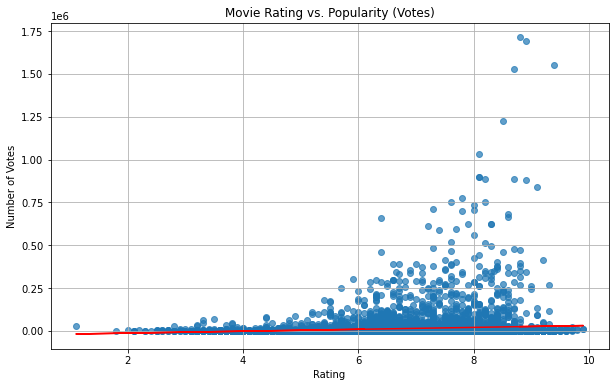

In [112]:
#Plotting VOTES (y-axis) against RATING (x-axis) to see if there's a correlation between ratings and popularity (votes).
# Tip: Tighter clustering of points around a diagonal trend line indicates a stronger correlation. 

import matplotlib.pyplot as plt
import numpy as py

#columns for the plot
ratings = df['RATING']
votes = df['VOTES']

# Creating the scatter plot
plt.figure(figsize=(10, 6)) 
plt.scatter(ratings, votes, alpha=0.7)  

# labels and title
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.title('Movie Rating vs. Popularity (Votes)')

m, b = py.polyfit(ratings, votes, 1) 
plt.plot(ratings, m * ratings + b, color='red')  #to Plot the trendline

# Show plot
plt.grid(True)
plt.show()


In [ ]:
Plot of movies released each year (Release_Year) to see how movie production has changed over time.

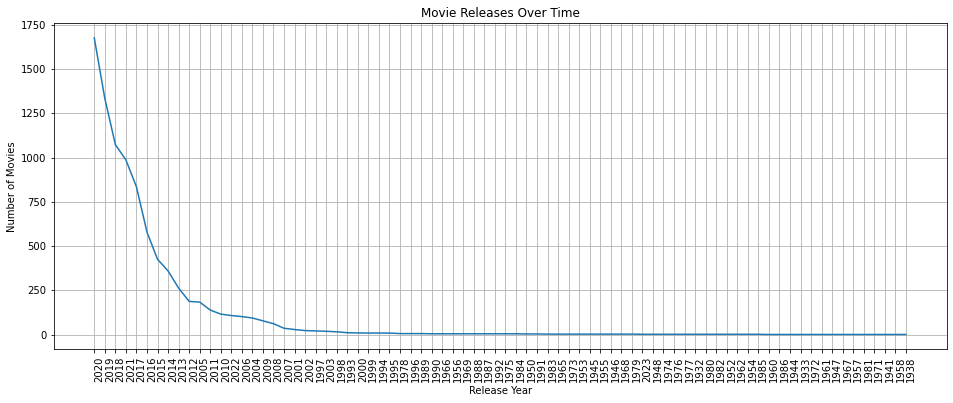

In [114]:

# Count movies by release year
movies_per_year = df['Release_Year'].value_counts()

# Creating line chart
plt.figure(figsize=(16, 6))  
plt.plot(movies_per_year.index, movies_per_year.values)

# labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Movie Releases Over Time')

#plot 
plt.xticks(rotation=90, ha="left")  
plt.grid(True)  # for gridlines
plt.show()


In [ ]:
PLOT OF Average Rating OF Each Director, IN ORDER TO Get TOP Five Directors

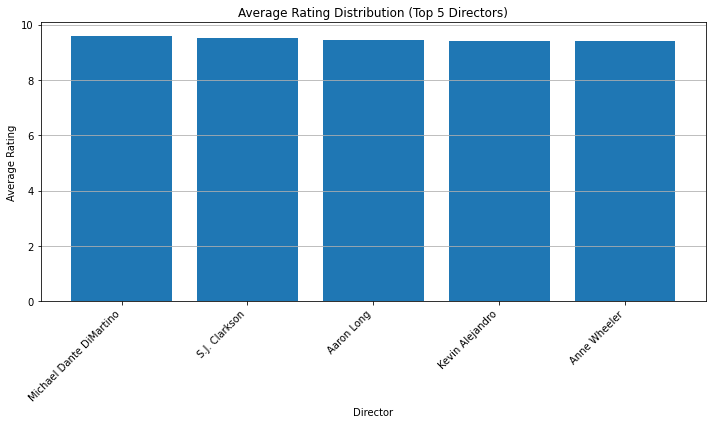

In [117]:
# average rating per director
director_ratings = (
    df.groupby('Director')['RATING']
    .mean() 
    .to_frame(name='Avg_Rating')
    .reset_index()
)

# Sort directors by average rating (descending) and select top 5
top_directors = director_ratings.sort_values(by='Avg_Rating', ascending=False).head(5)

# Create bar chart
plt.figure(figsize=(10, 6)) 
plt.bar(top_directors['Director'], top_directors['Avg_Rating'])

# labels and title
plt.xlabel('Director')  
plt.ylabel('Average Rating')
plt.title('Average Rating Distribution (Top 5 Directors)')


plt.xticks(rotation=45, ha='right')

# plot 
plt.grid(axis='y')  # Add gridlines on y-axis
plt.tight_layout()  # Adjusting layout to prevent overlapping elements
plt.show()
